In [1]:
import glob as glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
from run_length_encoding import *
from albumentations.augmentations.transforms import Downscale

In [2]:
train_28049_2 = pd.read_csv('./train_28049_2.csv')

In [98]:
transform = A.Compose(
        [
            A.Normalize(),
            A.Resize(448,448),
            #A.CoarseDropout(20,20,25,5, p = .6),
            #A.RandomGridShuffle(grid=(2,2), p = .6),
            A.RandomFog (fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, p = .6),
            #A.ColorJitter(p=1.),
            #A.ChannelShuffle(p=1.),
            A.OneOf(
                [
                    A.ColorJitter(),
                    A.ChannelShuffle()
               ]
            , p = 0.4),
            
            # 에러나는 이유 : 마스크의 shape에서 channel 이 없어서?
            '''
            A.Downscale(scale_min=0.3, scale_max=0.5,
                         interpolation=0,
                         p=1),
            '''
            ToTensorV2()
        ]
    )

SyntaxError: invalid syntax (3917552437.py, line 23)

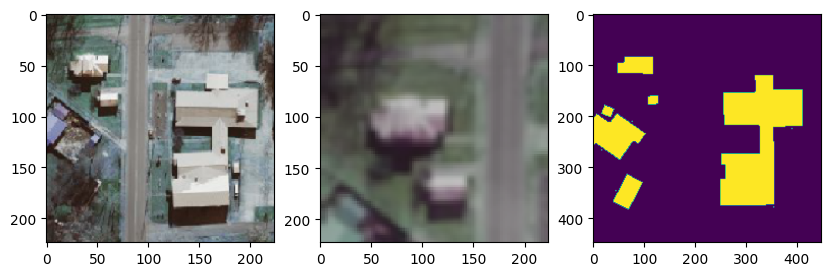

In [100]:
IDX = 5

test_mask = rle_decode(train_28049_2.mask_rle.iloc[IDX], shape=(224,224))
test_img = cv2.imread(train_28049_2.img_path[IDX])

augmented = transform(image=test_img, mask=test_mask)

plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.imshow(test_img)

plt.subplot(1,3,2)
plt.imshow(augmented['image'].permute(1,2,0)[:223,:223])

plt.subplot(1,3,3)
plt.imshow(augmented['mask'])